In [28]:
import re
def strip_all_but_numbers(stub):
    return int(re.sub('\D', '', stub))

# Read all CP2K output files for energy

In [29]:
import os

directory = "./output"
print(type(directory))
target_string="ENERGY| Total FORCE_EVAL ( QS ) energy (a.u.):"
mapping={}

for file in os.listdir(directory):
    filename = os.fsdecode(directory+"/"+file)
    if filename.endswith(".out"): 
        with open(filename,'r') as f:
            for line in f:
                if target_string in line:
                    mapping[strip_all_but_numbers(filename)]=float(line.replace(target_string,''))
                    break
        continue
    else:
        continue

<class 'str'>


In [30]:
temp=list(mapping.keys())
temp.sort()
temp

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

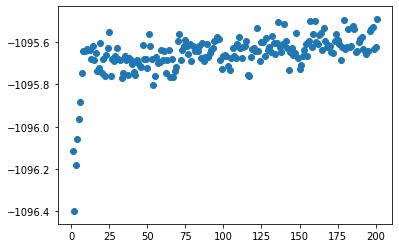

In [31]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*mapping.items()))
plt

In [32]:
import collections
od = collections.OrderedDict(sorted(mapping.items()))

<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

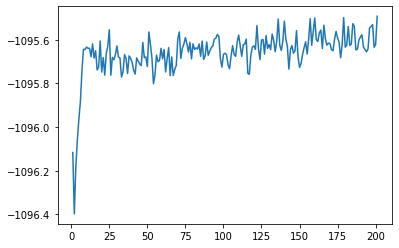

In [33]:
plt.plot(*zip(*od.items()))
plt

In [34]:
directory = "../coordinates_training/"
print(type(directory))
target_string="TotEnergy="
precalcEnergy={}

for file in os.listdir(directory):
    filename = os.fsdecode(directory+file)
    if filename.endswith(".xyz"): 
        with open(filename,'r') as f:
            for line in f:
                if target_string in line:
                    splits=line.split(' ')
                    energy=splits[0]
                    precalcEnergy[strip_all_but_numbers(filename)]=0.0367493*float(energy.replace(target_string,''))
                    #print(precalcEnergy[strip_all_but_numbers(filename)])
                    break
        continue
    else:
        continue

<class 'str'>


<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

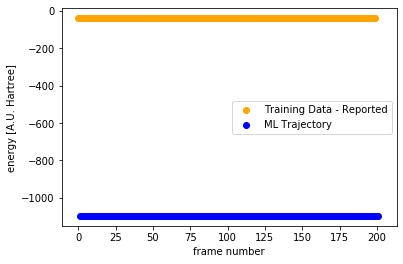

In [35]:
plt.scatter(*zip(*precalcEnergy.items()),color="orange",label="Training Data - Reported")
plt.scatter(*zip(*mapping.items()),color="blue",label="ML Trajectory")
plt.legend()
plt.xlabel("frame number")
plt.ylabel("energy [A.U. Hartree]")
plt

In [36]:
differences={}
for i in mapping:
    i=int(i)
    try:
        differences[i]=mapping[i]-precalcEnergy[i]
    except:
        print("%i doesnt exist")
    

%i doesnt exist
%i doesnt exist


In [37]:
differences

{176: -1055.0921583767322,
 114: -1055.0576836206837,
 124: -1055.1654804599507,
 8: -1055.1085457700865,
 51: -1055.0389717776454,
 186: -1055.001987329495,
 188: -1055.1005353715802,
 91: -1055.1300383137436,
 107: -1055.109224649098,
 116: -1055.2312464466208,
 132: -1055.0583878274826,
 33: -1055.246037400177,
 19: -1055.0696532725553,
 55: -1055.2341818112027,
 31: -1055.1456528567683,
 123: -1055.1334718771673,
 160: -1054.932930658389,
 136: -1054.9450594066464,
 28: -1055.1312648650896,
 44: -1055.145015763309,
 161: -1055.0694557693016,
 191: -1055.0337025461454,
 151: -1055.1415022846572,
 195: -1055.0686229640676,
 115: -1055.088864159655,
 99: -1055.2027159517163,
 1: -1055.5729342479947,
 67: -1055.236859152342,
 62: -1055.224242987055,
 79: -1055.1303978755036,
 82: -1055.1143407975305,
 85: -1055.1652529956823,
 105: -1055.114460750059,
 58: -1055.1706433374247,
 185: -1054.9916108982843,
 54: -1055.2477770893386,
 174: -1055.0446849764376,
 14: -1055.0887260619957,
 112

<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

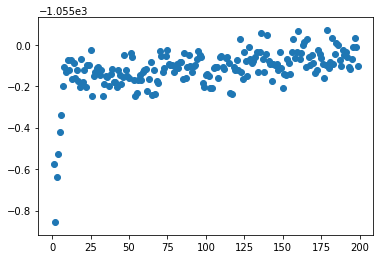

In [38]:
plt.scatter(*zip(*differences.items()))
plt

# Read slurm file for run energy

In [39]:
filename="../slurm-out7"
target_string="### NNP EW SUMMARY ###"
target_number=493
energy_list=[]
with open(filename,'r') as f:
    lines=f.readlines()
    energy_list.append(lines[target_number-1].split())
    for ind in range(target_number,len(lines)):
        if(target_string in lines[ind]):
            pass
        elif("Loop time" in lines[ind]):
            break
        else:
            energy_list.append(lines[ind].split())

In [40]:
import pandas as pd
header=energy_list.pop(0)
df = pd.DataFrame(energy_list, columns=header)
df['Step'] = df['Step'].astype(int)
df['TotEng'] = 0.0367493*df['TotEng'].astype(float)
df

,Step,Temp,E_pair,E_mol,TotEng,Press
0,0,0,-30039.2,0,-1103.919573,719.23759
1,1,8.1409265,-30039.407,0,-1103.919793,689.44014
2,2,28.416286,-30039.924,0,-1103.920381,605.33679
3,3,50.908637,-30040.492,0,-1103.920859,480.95995
4,4,65.547515,-30040.856,0,-1103.920969,334.70744
...,...,...,...,...,...,...
9996,9996,294.68341,-30033.818,0,-1103.454437,11.31899
9997,9997,300.14723,-30033.918,0,-1103.453150,35.206049
9998,9998,306.58696,-30034.042,0,-1103.451864,55.06749
9999,9999,312.22894,-30034.147,0,-1103.450615,69.953712


In [41]:
df['TotEng'][0]

-1103.91957256

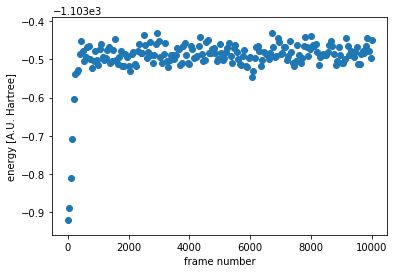

In [42]:

plt.scatter(df['Step'][0::50],df['TotEng'][0::50])
plt.xlabel("frame number")
plt.ylabel("energy [A.U. Hartree]")
plt.show()

In [43]:
factor={}
for i in mapping:
    i=int(i)
    try:
        factor[i]=df['TotEng'][50*(i-1)]/mapping[i]
    except:
        print("%i doesnt exist")

<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

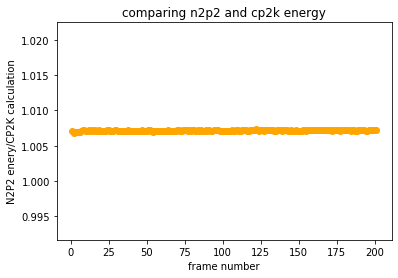

In [83]:
plt.scatter(*zip(*factor.items()),color="orange")
plt.ylabel("N2P2 enery/CP2K calculation")
plt.xlabel("frame number")
plt.title("comparing n2p2 and cp2k energy")
plt

In [45]:
df['Cp2k']=[0]*len(df)
df['Cp2k'] = df['Cp2k'].astype(float)
df

,Step,Temp,E_pair,E_mol,TotEng,Press,Cp2k
0,0,0,-30039.2,0,-1103.919573,719.23759,0.0
1,1,8.1409265,-30039.407,0,-1103.919793,689.44014,0.0
2,2,28.416286,-30039.924,0,-1103.920381,605.33679,0.0
3,3,50.908637,-30040.492,0,-1103.920859,480.95995,0.0
4,4,65.547515,-30040.856,0,-1103.920969,334.70744,0.0
...,...,...,...,...,...,...,...
9996,9996,294.68341,-30033.818,0,-1103.454437,11.31899,0.0
9997,9997,300.14723,-30033.918,0,-1103.453150,35.206049,0.0
9998,9998,306.58696,-30034.042,0,-1103.451864,55.06749,0.0
9999,9999,312.22894,-30034.147,0,-1103.450615,69.953712,0.0


In [51]:
print(mapping)

{176: -1095.6116058130322, 114: -1095.6197029160758, 124: -1095.6910598844486, 8: -1095.6437682109045, 51: -1095.5643656181785, 186: -1095.538419557269, 188: -1095.6436137102592, 91: -1095.6525025000806, 107: -1095.667731813889, 116: -1095.7539531783377, 132: -1095.5739453503777, 33: -1095.770526472944, 19: -1095.6058877890953, 55: -1095.7616122979416, 31: -1095.6792498760474, 123: -1095.6404289613833, 160: -1095.499910374295, 201: -1095.4923740461163, 136: -1095.5051037946564, 28: -1095.6917943438596, 44: -1095.698280272962, 161: -1095.5995917395066, 191: -1095.5769216346434, 151: -1095.7088211966022, 195: -1095.6419544289856, 115: -1095.597116289203, 99: -1095.7255634332523, 1: -1096.1164440234556, 67: -1095.76353003105, 62: -1095.7476692700661, 79: -1095.6877003982406, 82: -1095.6370960383235, 85: -1095.6761352726312, 105: -1095.674372473096, 58: -1095.6945223718117, 185: -1095.5264415915642, 54: -1095.8012293879146, 174: -1095.5618980552977, 14: -1095.6186422713868, 112: -1095.6761

In [55]:
for i in mapping:
    df.at[50*(i-1),'Cp2k']=mapping[i]
df

,Step,Temp,E_pair,E_mol,TotEng,Press,Cp2k
0,0,0,-30039.2,0,-1103.919573,719.23759,-1096.116444
1,1,8.1409265,-30039.407,0,-1103.919793,689.44014,0.000000
2,2,28.416286,-30039.924,0,-1103.920381,605.33679,0.000000
3,3,50.908637,-30040.492,0,-1103.920859,480.95995,0.000000
4,4,65.547515,-30040.856,0,-1103.920969,334.70744,0.000000
...,...,...,...,...,...,...,...
9996,9996,294.68341,-30033.818,0,-1103.454437,11.31899,0.000000
9997,9997,300.14723,-30033.918,0,-1103.453150,35.206049,0.000000
9998,9998,306.58696,-30034.042,0,-1103.451864,55.06749,0.000000
9999,9999,312.22894,-30034.147,0,-1103.450615,69.953712,0.000000


# Plot CP2K v/s N2P2 energy

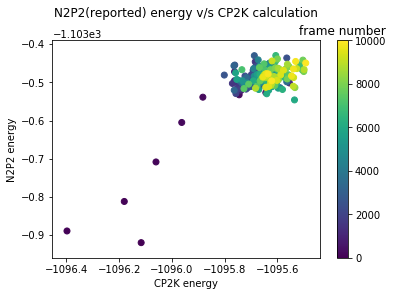

In [86]:
plt.scatter(df['Cp2k'][0::50],df['TotEng'][0::50],c=df['Step'][::50],picker=True)
plt.xlabel("CP2K energy")
plt.ylabel("N2P2 energy")

#plt.rcParams['figure.dpi'] = 200
#plt.rcParams['figure.figsize'] = [14, 16]
clb=plt.colorbar()
clb.ax.set_title("frame number")
plt.title("N2P2(reported) energy v/s CP2K calculation",y=1.08)
#plt.colorbar.setlabel("timestep")
plt.show()

# Plot CP2K, N2p2 energy v/s frame

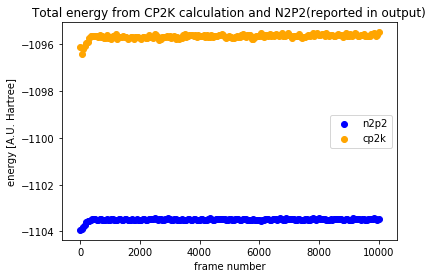

In [88]:
plt.scatter(df['Step'][0::50],df['TotEng'][0::50],color="blue",label='n2p2')
plt.scatter(df['Step'][0::50],df['Cp2k'][0::50],color="orange",label='cp2k')
plt.xlabel("frame number")
plt.ylabel("energy [A.U. Hartree]")
plt.legend()
plt.title("Total energy from CP2K calculation and N2P2(reported in output)")
plt.show()

# Plot Cp2k, n2p2 relative energy v/s frame
Relative energy is energy - lowest energy recorded

In [79]:
from statistics import median
n2p2Ener=[]
cp2kEner=[]
n2p2min=min(df['TotEng'][0::50])
cp2kmin=min(df['Cp2k'][0::50])
for i in df['TotEng'][0::50]:
    n2p2Ener.append(i-n2p2min)
    
for i in df['Cp2k'][0::50]:
    cp2kEner.append(i-cp2kmin)

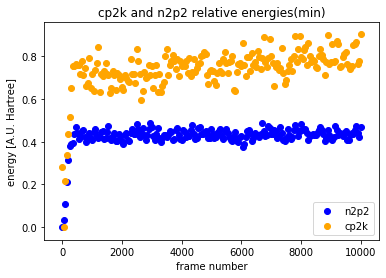

In [80]:
plt.scatter(df['Step'][0::50],n2p2Ener,color="blue",label='n2p2')
plt.scatter(df['Step'][0::50],cp2kEner,color="orange",label="cp2k")
plt.xlabel("frame number")
plt.ylabel("energy [A.U. Hartree]")
plt.title("cp2k and n2p2 relative energies(min)")
plt.legend()
plt.show()

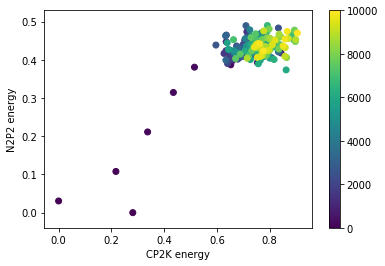

In [81]:
plt.scatter(cp2kEner,n2p2Ener,c=df['Step'][::50],picker=True)
plt.xlabel("CP2K energy")
plt.ylabel("N2P2 energy")

#plt.rcParams['figure.dpi'] = 200
#plt.rcParams['figure.figsize'] = [14, 16]
plt.colorbar()
#plt.colorbar.setlabel("timestep")
plt.show()